<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#ОТВЕТ:" data-toc-modified-id="ОТВЕТ:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>ОТВЕТ:</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Проверка-на-адекватность" data-toc-modified-id="Проверка-на-адекватность-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Проверка на адекватность</a></span></li><li><span><a href="#Тестируем-модель" data-toc-modified-id="Тестируем-модель-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Тестируем модель</a></span></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li><li><span><a href="#Вывод-по-результатам-исследования" data-toc-modified-id="Вывод-по-результатам-исследования-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод по результатам исследования</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Описание данных

Признаки:

    RowNumber — индекс строки в данных
    CustomerId — уникальный идентификатор клиента
    Surname — фамилия
    CreditScore — кредитный рейтинг
    Geography — страна проживания
    Gender — пол
    Age — возраст
    Tenure — количество недвижимости у клиента
    Balance — баланс на счёте
    NumOfProducts — количество продуктов банка, используемых клиентом
    HasCrCard — наличие кредитной карты
    IsActiveMember — активность клиента
    EstimatedSalary — предполагаемая зарплата
    
Целевой признак:

    Exited — факт ухода клиента

## Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, f1_score
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('/datasets/Churn.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


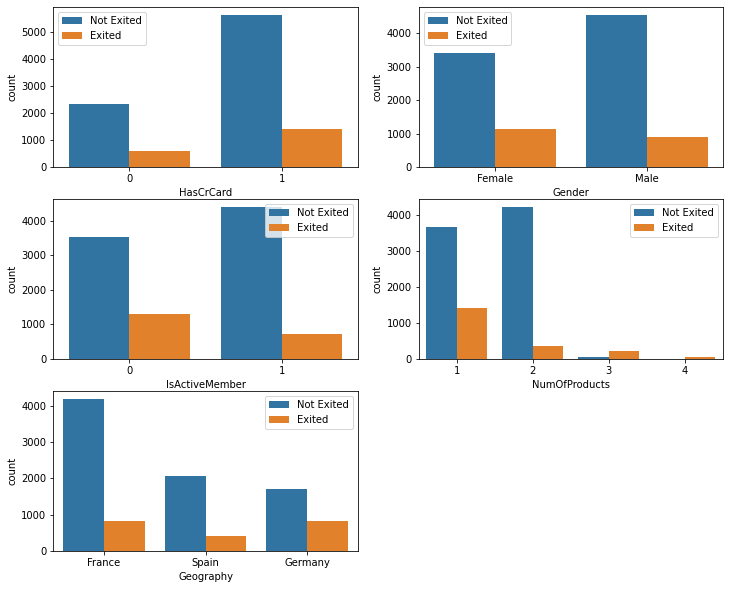

In [4]:
import seaborn as sb
import matplotlib.pyplot as plt 

plt.figure(figsize=(12,10))
columns = ['HasCrCard', 'Gender', 'IsActiveMember', 'NumOfProducts', 'Geography']
for i in range(5):
    plt.subplot(3, 2, i+1)
    sb.countplot(x=columns[i], hue='Exited', data=df)
    plt.xticks(rotation=0)
    plt.legend(["Not Exited", "Exited"])
plt.show()

    RowNumber — столбец дублирует индекс(можно удалить)
    Surname — можно удалить
    CustomerId - можно удалить
    Geography, Gender — преобразовать методом One hot Encoder
    Tenure — заменим средним
    CreditScore, Age, Tenur, Balance, NumOfProducts, EstimatedSalary — масштабируем

In [5]:
# Удаляю лишние столбцы
df=df.drop(['RowNumber','Surname', 'CustomerId'], axis=1)

In [6]:
# Заполняю пропуски на среднее
df['Tenure'] = df['Tenure'].fillna(df['Tenure'].mean()).astype('int64')

In [7]:
# Избавляюсь от категориальных признаков
df = pd.get_dummies(df, drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


В нашем случае нет отдельно выделенной тестовой выборки, поэтому существющие данные мы делим на три выборки:
обучающая 60% для обучения модели
валидационная 20% для выбора лучшего алгоритма и оптимальных параметров
тестовая 20% для финального теста лучшей модели.

Разделение выборки производили в 2 этапа:
Выделили валидационную 60%
Разделили оставшиеся 40% на 2 равные части (валидационная и тестовая)

In [8]:
# Разбиваем на параметры и целевой признак
features=df.drop(['Exited'],axis=1)
target=df['Exited']
# Разбиваем на тренировочную, тестовую и валидационную выборки
target = df['Exited']
features = df.drop('Exited', axis=1)

train_features, valid_features, train_target, valid_target = train_test_split(features, target, test_size=0.4, 
                                                                              random_state=12345)
valid_features, test_features, valid_target, test_target = train_test_split(valid_features, valid_target, test_size=0.5, 
                                                                              random_state=12345 )
print(train_features.shape, valid_features.shape, test_features.shape)
print(train_target.shape, valid_target.shape, test_target.shape)

(6000, 11) (2000, 11) (2000, 11)
(6000,) (2000,) (2000,)


In [9]:
# Масштабируем численные признаки выборок для выравнивания весов
numeric=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler=StandardScaler()
scaler.fit(train_features[numeric])
train_features[numeric]=scaler.transform(train_features[numeric])
valid_features[numeric]=scaler.transform(valid_features[numeric])
test_features[numeric]=scaler.transform(test_features[numeric])
train_features.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7479,-0.886751,-0.373192,1.109334,1.232271,-0.891560,1,0,-0.187705,0,1,1
3411,0.608663,-0.183385,1.109334,0.600563,-0.891560,0,0,-0.333945,0,0,0
6027,2.052152,0.480939,-0.700051,1.027098,0.830152,0,1,1.503095,1,0,1
1247,-1.457915,-1.417129,0.385580,-1.233163,0.830152,1,0,-1.071061,0,0,1
3716,0.130961,-1.132419,-1.061928,1.140475,-0.891560,0,0,1.524268,1,0,0


## Исследование задачи

0    7963
1    2037
Name: Exited, dtype: int64

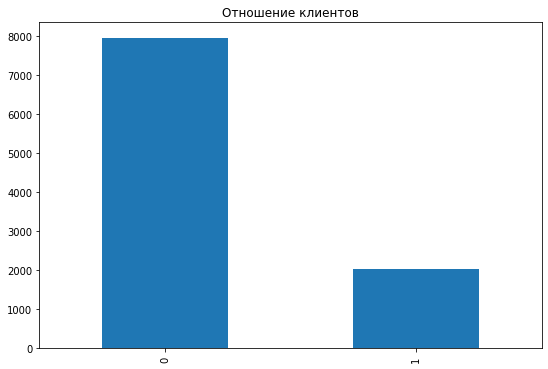

In [10]:
df['Exited'].value_counts().plot(kind='bar',figsize=(9,6),title='Oтношение клиентов')
df['Exited'].value_counts()

Есть дисбаланс классов в пользу оставшихся клиентов. Это может привести модель к склонению в распространённый вариант ответа.

Обучение моделей:

    Решающее дерево
    Случайный лес
    Логистическая регрессия

1) Обучение модели дерева решений с перебором глубины, найдем гиперпараметры с наибольшей метрикой f1.

2) Обучение модели случайного леса с перебором гиперпараметров, которые дают наибольшую метрику f1.

3) Обучение и оценка метрик с помощью модели Логистической регрессии

In [11]:
# Обучение модели дерева решений
f1_best = 0
depth_best = 0
for depth in range(7, 11):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(train_features, train_target)
    prediction = model.predict(valid_features)
    f1 = f1_score(valid_target, prediction)
    if f1>f1_best:
            f1_best=f1
            depth_best=depth
print('Max depth', depth_best,'F1-score', f1_best)

Max depth 9 F1-score 0.5722300140252455


In [12]:
#Проведем оценку accuracy, precision, recall, F1, AUC-ROC на полученных гиперпараметрах
model = DecisionTreeClassifier(random_state=12345, max_depth=9)
model.fit(train_features, train_target)
prediction = model.predict(valid_features)
print('Accuracy', accuracy_score(valid_target, prediction))
print('Precision', precision_score(valid_target, prediction))
print('Recall', recall_score(valid_target, prediction))
print('F1', f1_score(valid_target, prediction))
probabilities_valid = model.predict_proba(valid_features)[:, 1]
print("AUC-ROC", roc_auc_score(valid_target, probabilities_valid))

Accuracy 0.8475
Precision 0.6915254237288135
Recall 0.4880382775119617
F1 0.5722300140252455
AUC-ROC 0.78270041556022


In [13]:
#Обучение модели случайного леса
estim_best = 0
depth_best = 0

for estim in range (60, 63):
    for depth in range(10, 12):
        model = RandomForestClassifier(n_estimators=estim, max_depth=depth, random_state=12345)
        model.fit(train_features, train_target)
        prediction = model.predict(valid_features)
        f1 = f1_score(valid_target, prediction)
        if f1>f1_best:
            f1_best=f1
            estim_best=estim
            depth_best=depth
        

print('n_estimators =', estim_best, 'Max depth', depth_best, 'F1-score', f1_best)

n_estimators = 62 Max depth 11 F1-score 0.588957055214724


In [14]:
#Проведем оценку accuracy, precision, recall, F1, AUC-ROC на полученных гиперпараметрах
model = RandomForestClassifier(n_estimators=60, max_depth=11, random_state=12345)
model.fit(train_features, train_target)
prediction = model.predict(valid_features)
print('Accuracy', accuracy_score(valid_target, prediction))
print('Precision', precision_score(valid_target, prediction))
print('Recall', recall_score(valid_target, prediction))
print('F1', f1_score(valid_target, prediction))
probabilities_valid = model.predict_proba(valid_features)[:, 1]
print("AUC-ROC", roc_auc_score(valid_target, probabilities_valid))

Accuracy 0.8655
Precision 0.8170212765957446
Recall 0.45933014354066987
F1 0.5880551301684532
AUC-ROC 0.8474464520109607


In [15]:
#Обучение и оценка метрик с помощью модели Логистической регрессии
model =  LogisticRegression()
model.fit(train_features, train_target)
prediction = model.predict(valid_features)
print('Accuracy', accuracy_score(valid_target, prediction))
print('Precision', precision_score(valid_target, prediction))
print('Recall', recall_score(valid_target, prediction))
print('F1', f1_score(valid_target, prediction))
probabilities_valid = model.predict_proba(valid_features)[:, 1]
print("AUC-ROC", roc_auc_score(valid_target, probabilities_valid))

Accuracy 0.8025
Precision 0.5657142857142857
Recall 0.23684210526315788
F1 0.33389544688026984
AUC-ROC 0.758804190685886


Из-за несбалансированности данных, все модели имеют recall ниже, чем percision, это влияет на F-меру

## Борьба с дисбалансом

1) Обучение моделей с параметром автоматической регулировки весов

In [16]:
# Модель дерева решений
# Подбор гиперпараметров
f1_best = 0
depth_best = 0
for depth in range(2, 18): 
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced')
    model.fit(train_features, train_target)
    prediction = model.predict(valid_features)
    f1 = f1_score(valid_target, prediction)
    if f1>f1_best:
            f1_best=f1
            depth_best=depth
print('Max depth', depth_best,'F1-score', f1_best)

# Расчет метрик
model = DecisionTreeClassifier(random_state=12345, max_depth=depth_best, class_weight='balanced')
model.fit(train_features, train_target)
prediction = model.predict(valid_features)
print('Accuracy', accuracy_score(valid_target, prediction))
print('Precision', precision_score(valid_target, prediction))
print('Recall', recall_score(valid_target, prediction))
print('F1', f1_score(valid_target, prediction))
probabilities_valid = model.predict_proba(valid_features)[:, 1]
print("AUC-ROC", roc_auc_score(valid_target, probabilities_valid))

Max depth 5 F1-score 0.5963791267305644
Accuracy 0.8105
Precision 0.5374280230326296
Recall 0.6698564593301436
F1 0.5963791267305644
AUC-ROC 0.8310244134068074


In [17]:
# Модель случайного леса
# Подбор гиперпараметров
f1_best = 0
estim_best = 0
depth_best = 0

for estim in range (91, 93):
    for depth in range(7, 9):
        model = RandomForestClassifier(n_estimators=estim, max_depth=depth, random_state=12345, class_weight='balanced')
        model.fit(train_features, train_target)
        prediction = model.predict(valid_features)
        f1 = f1_score(valid_target, prediction)
        if f1>f1_best:
            f1_best=f1
            estim_best=estim
            depth_best=depth      
print('n_estimators =', estim_best, 'Max depth', depth_best, 'F1-score', f1_best)

# Расчет метрик
model = RandomForestClassifier(n_estimators=estim_best, max_depth=depth_best, random_state=12345, class_weight='balanced')
model.fit(train_features, train_target)
prediction = model.predict(valid_features)
print('Accuracy', accuracy_score(valid_target, prediction))
print('Precision', precision_score(valid_target, prediction))
print('Recall', recall_score(valid_target, prediction))
print('F1', f1_score(valid_target, prediction))
probabilities_valid = model.predict_proba(valid_features)[:, 1]
print("AUC-ROC", roc_auc_score(valid_target, probabilities_valid))

n_estimators = 91 Max depth 7 F1-score 0.630457933972311
Accuracy 0.8265
Precision 0.5681381957773513
Recall 0.7081339712918661
F1 0.630457933972311
AUC-ROC 0.8543452355748582


In [18]:
# Модель логистической регрессии
model =  LogisticRegression(class_weight='balanced')
model.fit(train_features, train_target)
prediction = model.predict(valid_features)
print('Accuracy', accuracy_score(valid_target, prediction))
print('Precision', precision_score(valid_target, prediction))
print('Recall', recall_score(valid_target, prediction))
print('F1', f1_score(valid_target, prediction))
probabilities_valid = model.predict_proba(valid_features)[:, 1]
print("AUC-ROC", roc_auc_score(valid_target, probabilities_valid))

Accuracy 0.7015
Precision 0.38050734312416556
Recall 0.6818181818181818
F1 0.48843187660668386
AUC-ROC 0.763661466619082


F1-мера стала лучше

2) Применим функцию Downsampling и уменьшим колличество target=0

In [19]:
def downsampling(features,target,fraction):
    #Разделяем выборку по значениям целевой функции
    features_null=features[target==0]
    features_one=features[target==1]
    target_null=target[target==0]
    target_one=target[target==1]
    
    #уменьшаем путем умножения на десятую часть и соединяем обратно
    downsampling_features=pd.concat([features_null.sample(frac=fraction,random_state=12345)]+[features_one])
    downsampling_target=pd.concat([target_null.sample(frac=fraction,random_state=12345)]+[target_one])
    
    # Перемешиваем
    downsampling_features,downsampling_target=shuffle(downsampling_features,downsampling_target,random_state=12345)
    
    return downsampling_features,downsampling_target

In [20]:
features_balance,target_balance=downsampling(features,target,0.25)

In [21]:
# Модель дерева решений
# Подбор гиперпараметров
f1_best = 0
depth_best = 0
for depth in range(2, 18): #(уменьшил ранг чтобы не грузить сервер, перебрал все заранее)
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_balance,target_balance)
    prediction = model.predict(valid_features)
    f1 = f1_score(valid_target, prediction)
    if f1>f1_best:
            f1_best=f1
            depth_best=depth
print('Max depth', depth_best,'F1-score', f1_best)

# Расчет метрик
model = DecisionTreeClassifier(random_state=12345, max_depth=depth_best)
model.fit(features_balance,target_balance)
prediction = model.predict(valid_features)
print('Accuracy', accuracy_score(valid_target, prediction))
print('Precision', precision_score(valid_target, prediction))
print('Recall', recall_score(valid_target, prediction))
print('F1', f1_score(valid_target, prediction))
probabilities_valid = model.predict_proba(valid_features)[:, 1]
print("AUC-ROC", roc_auc_score(valid_target, probabilities_valid))

Max depth 4 F1-score 0.4020304568527919
Accuracy 0.7055
Precision 0.3492063492063492
Recall 0.47368421052631576
F1 0.4020304568527919
AUC-ROC 0.6354404212461968


In [22]:
# Модель случайного леса
# Подбор гиперпараметров
f1_best = 0
estim_best = 0
depth_best = 0

for estim in range (30, 31):
    for depth in range(9, 10):
        model = RandomForestClassifier(n_estimators=estim, max_depth=depth, random_state=12345)
        model.fit(features_balance,target_balance)
        prediction = model.predict(valid_features)
        f1 = f1_score(valid_target, prediction)
        if f1>f1_best:
            f1_best=f1
            estim_best=estim
            depth_best=depth      
print('n_estimators =', estim_best, 'Max depth', depth_best, 'F1-score', f1_best)

# Расчет метрик
model = RandomForestClassifier(n_estimators=estim_best, max_depth=depth_best, random_state=12345)
model.fit(features_balance,target_balance)
prediction = model.predict(valid_features)
print('Accuracy', accuracy_score(valid_target, prediction))
print('Precision', precision_score(valid_target, prediction))
print('Recall', recall_score(valid_target, prediction))
print('F1', f1_score(valid_target, prediction))
probabilities_valid = model.predict_proba(valid_features)[:, 1]
print("AUC-ROC", roc_auc_score(valid_target, probabilities_valid))

n_estimators = 30 Max depth 9 F1-score 0.34763948497854075
Accuracy 0.544
Precision 0.2479591836734694
Recall 0.5813397129186603
F1 0.34763948497854075
AUC-ROC 0.555519934187843


In [23]:
# Модель логистической регрессии
model =  LogisticRegression()
model.fit(features_balance,target_balance)
prediction = model.predict(valid_features)
print('Accuracy', accuracy_score(valid_target, prediction))
print('Precision', precision_score(valid_target, prediction))
print('Recall', recall_score(valid_target, prediction))
probabilities_valid = model.predict_proba(valid_features)[:, 1]
print("AUC-ROC", roc_auc_score(valid_target, probabilities_valid))

Accuracy 0.6715
Precision 0.3595769682726204
Recall 0.7320574162679426
AUC-ROC 0.7452122865490355


Метрики стали хуже, такой баланс данных не подходит

3) Применим функцию Upsampling увеличим колличество target=0

In [24]:
def upsampling (features,target,repeat):
    #Разделяем выборку по значениям целевой функции
    target_one=target[target==1]
    target_null=target[target==0]
    features_one=features[target==1]
    features_null=features[target==0]
    
    #Увеличиваем и соединяем обратно
    upsampling_features=pd.concat([features_null]+[features_one]*repeat)
    upsampling_target=pd.concat([target_null]+[target_one]*repeat)
    
    # Перемешиваем
    upsampling_features,upsampling_target=shuffle(upsampling_features,upsampling_target,random_state=12345)
    
    return upsampling_features,upsampling_target

In [25]:
features_balance,target_balance=upsampling(train_features,train_target,4)

In [26]:
# Модель дерева решений
# Подбор гиперпараметров
f1_best = 0
depth_best = 0
for depth in range(4, 8):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_balance,target_balance)
    prediction = model.predict(valid_features)
    f1 = f1_score(valid_target, prediction)
    if f1>f1_best:
            f1_best=f1
            depth_best=depth
print('Max depth', depth_best,'F1-score', f1_best)

# Расчет метрик
model = DecisionTreeClassifier(random_state=12345, max_depth=depth_best)
model.fit(features_balance,target_balance)
prediction = model.predict(valid_features)
print('Accuracy', accuracy_score(valid_target, prediction))
print('Precision', precision_score(valid_target, prediction))
print('Recall', recall_score(valid_target, prediction))
print('F1', f1_score(valid_target, prediction))
probabilities_valid = model.predict_proba(valid_features)[:, 1]
print("AUC-ROC", roc_auc_score(valid_target, probabilities_valid))
fpr_tree, tpr_tree, thresholds = roc_curve(valid_target, probabilities_valid)

Max depth 5 F1-score 0.5963791267305644
Accuracy 0.8105
Precision 0.5374280230326296
Recall 0.6698564593301436
F1 0.5963791267305644
AUC-ROC 0.8310244134068074


In [27]:
# Модель случайного леса
# Подбор гиперпараметров
f1_best = 0
estim_best = 0
depth_best = 0

for estim in range (56, 58):
    for depth in range(8, 10):
        model = RandomForestClassifier(n_estimators=estim, max_depth=depth, random_state=12345)
        model.fit(features_balance,target_balance)
        prediction = model.predict(valid_features)
        f1 = f1_score(valid_target, prediction)
        if f1>f1_best:
            f1_best=f1
            estim_best=estim
            depth_best=depth      
print('n_estimators =', estim_best, 'Max depth', depth_best, 'F1-score', f1_best)

# Расчет метрик
model = RandomForestClassifier(n_estimators=estim_best, max_depth=depth_best, random_state=12345)
model.fit(features_balance,target_balance)
prediction = model.predict(valid_features)
print('Accuracy', accuracy_score(valid_target, prediction))
print('Precision', precision_score(valid_target, prediction))
print('Recall', recall_score(valid_target, prediction))
print('F1', f1_score(valid_target, prediction))
probabilities_valid = model.predict_proba(valid_features)[:, 1]
print("AUC-ROC", roc_auc_score(valid_target, probabilities_valid))
fpr_forest, tpr_forest, thresholds = roc_curve(valid_target, probabilities_valid)

n_estimators = 57 Max depth 9 F1-score 0.6328042328042329
Accuracy 0.8265
Precision 0.5673624288425048
Recall 0.715311004784689
F1 0.6328042328042329
AUC-ROC 0.855075641638287


In [28]:
# Модель логистической регрессии
model =  LogisticRegression()
model.fit(features_balance,target_balance)
prediction = model.predict(valid_features)
print('Accuracy', accuracy_score(valid_target, prediction))
print('Precision', precision_score(valid_target, prediction))
print('Recall', recall_score(valid_target, prediction))
print('F1', f1_score(valid_target, prediction))
probabilities_valid = model.predict_proba(valid_features)[:, 1]
print("AUC-ROC", roc_auc_score(valid_target, prediction))
fpr_log, tpr_log, thresholds = roc_curve(valid_target, probabilities_valid)

Accuracy 0.7015
Precision 0.38050734312416556
Recall 0.6818181818181818
F1 0.48843187660668386
AUC-ROC 0.6942592805424663


<Figure size 432x288 with 0 Axes>

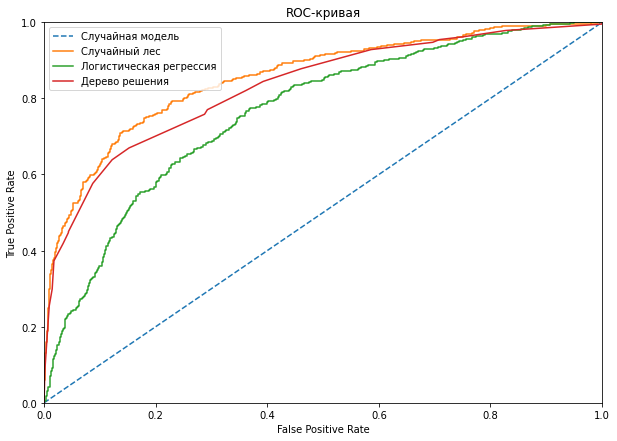

In [29]:
#Визуализируем AUC-ROC посредством графика площади

plt.figure()

plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr_forest,tpr_forest)
plt.plot(fpr_log,tpr_log)
plt.plot(fpr_tree,tpr_tree)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(('Случайная модель','Случайный лес','Логистическая регрессия','Дерево решения'),
           loc= 'upper left') 
plt.show()

Наилучшее качество модели было достигнуто при взвешивании классов параметром class_weight='balanced' с использование модели случайного леса. Так же метрика AUC-ROC случайного леса лучше остальных

## Тестирование модели

In [30]:
#Обучим финальную модель
model_final = RandomForestClassifier(n_estimators=100, max_depth=8, random_state=12345, class_weight='balanced')
model_final.fit(train_features, train_target)
prediction = model_final.predict(valid_features)
print('Accuracy', accuracy_score(valid_target, prediction))
print('Precision', precision_score(valid_target, prediction))
print('Recall', recall_score(valid_target, prediction))
print('F1', f1_score(valid_target, prediction))
probabilities_valid = model_final.predict_proba(valid_features)[:, 1]
print("AUC-ROC", roc_auc_score(valid_target, probabilities_valid))

Accuracy 0.8315
Precision 0.5828220858895705
Recall 0.6818181818181818
F1 0.6284454244762954
AUC-ROC 0.8569371941519124


### Проверка на адекватность

In [31]:
#Создаем константную модель
target_predict_constant = pd.Series([0]*len(valid_target))
target_predict_constant.value_counts()

0    2000
dtype: int64

In [32]:
#Сравним показатель точности (accuracy_score) константной модели и финальной
print('accuracy_score константой модели:', accuracy_score(valid_target, target_predict_constant))
print('accuracy_score финальной модели:', accuracy_score(valid_target, prediction))

accuracy_score константой модели: 0.791
accuracy_score финальной модели: 0.8315


In [33]:
#Сравним AUC-ROC, остальные метрики не работают на константной модели.
print('AUC-ROC константой модели:', roc_auc_score(valid_target, target_predict_constant))
print('AUC-ROC финальной модели:', roc_auc_score(valid_target, probabilities_valid))

AUC-ROC константой модели: 0.5
AUC-ROC финальной модели: 0.8569371941519124


Метрики финальной модели лучше, чем константной, соответственно, модель является адекватной

### Тестируем модель

In [34]:
model_final
prediction = model_final.predict(test_features)
print('Accuracy', accuracy_score(test_target, prediction))
print('Precision', precision_score(test_target, prediction))
print('Recall', recall_score(test_target, prediction))
print('F1', f1_score(test_target, prediction))
probabilities_valid = model_final.predict_proba(test_features)[:, 1]
print("AUC-ROC", roc_auc_score(test_target, probabilities_valid))
fpr, tpr, thresholds = roc_curve(test_target, probabilities_valid)

Accuracy 0.8235
Precision 0.5697211155378487
Recall 0.6761229314420804
F1 0.6183783783783784
AUC-ROC 0.856683921201791


<Figure size 432x288 with 0 Axes>

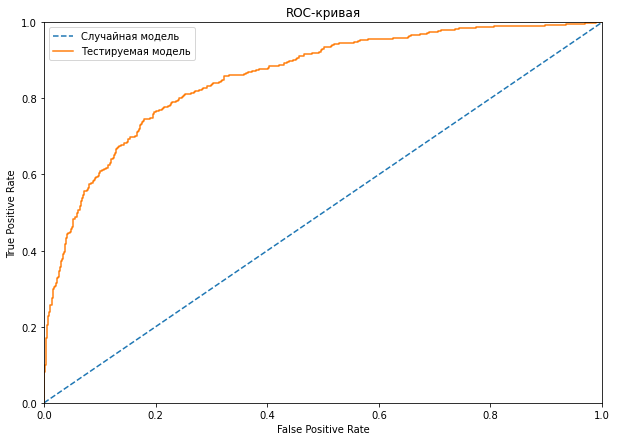

In [35]:
plt.figure()

plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(('Случайная модель','Тестируемая модель'),
           loc= 'upper left') 
plt.show()

### Вывод:

    Модели со сбалансированными данными путем увеличения количества недостающих классов показали себя лучше других видов баланса и несбалансированных моделей. 
    Финальная модель достигла заданой метрики (F1 > 0.59) и показывает адекватные результаты.
    Модель характеризуется высоким показателем полноты = 0.67 (min = 0, max = 1), поэтому она с высокой вероятностью предскажит уход клиента из банка.
    Показатель точности невысокий = 0.56 (min = 0, max = 1) — модель верно предсказывает только половину ухода клиентов.

    С точки зрения бизнеса полученная модель поможет маркетологам лучше определять килентов, которые могут уйти в ближайшее время. Важно, что модель покрывает большое количество клиентов, в данном случае это важнее чем точность.
    
    Для улучшения модели следует использовать данные, отражающие отношения клиента с банком в динамике.

## Вывод по результатам исследования

    В первоначальные данных наблюдался значительный дисбаланс (80% ответов целевого признака были негативными и только 20% позитивными), из-за чего обученная на этих данных модель не проходила проверку на адекватность. Все модели не первоначальных данных характеризовались высокой степенью ошибок и низким качеством взвешенной величины (F1) — модели показывали низкие результаты точности и полноты.

    Мы устранили дисбаланс классов в обучающей выборки методом увеличения количества недостающих классов. 

    На новых данных все модели показали результат выше, чем на несбалансированной выборке. Лучшие показатели были у модели случайного леса.

    Было принято решение продолжать улучшение модели на основании алгоритма случайный лес (RandomForestClassifier)

    Финальные параметры выбранной модели RandomForestClassifier(n_estimators=100, max_depth=8, random_state=12345, class_weight='balanced')

    Финальная модель прошла проверку на адекватность в сравнении с контантной моделью: accuracy_score константой модели < accuracy_score финальной модели.
    AUC-ROC константой модели: 0.5 < AUC-ROC финальной модели

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*